# In this Notebook I am taking a real life image of a handwritten character and classifying it with my saved model. 

## This will test the real life accuracy and will act as a true test of performance. 



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
reloaded = tf.keras.models.load_model(
      "/Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model")

reloaded.summary()

2022-02-27 22:28:51.940853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-27 22:28:51.941278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooli

In [3]:
reloaded.layers[0].input_shape

(None, 28, 28, 1)

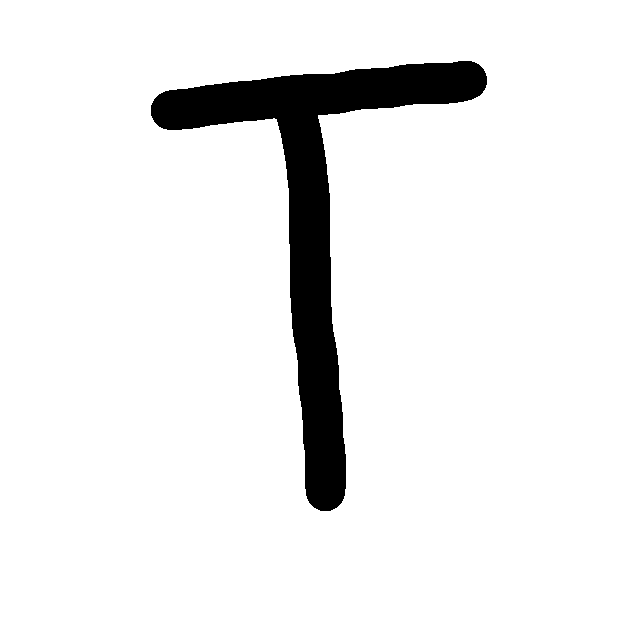

In [4]:
from PIL import Image
user_test = '/Users/puravgupta/Downloads/T.png'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("/Users/puravgupta/Downloads/bw_image.jpg")
bw

395641


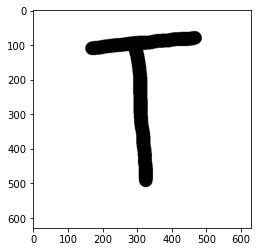

In [5]:
img_array = cv2.imread("/Users/puravgupta/Downloads/bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()

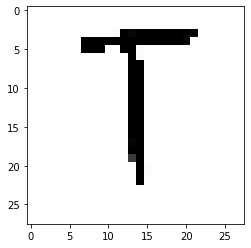

In [6]:
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

In [7]:
new_array = np.expand_dims(new_array, axis=0)
user_test = tf.keras.utils.normalize(new_array, axis = 1)

In [8]:
characters = ['0','1','2','3','4','5','6','7','8','9',
'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [9]:
predicted = reloaded.predict([[user_test]])
a = predicted[0][0]
for i in range(0,62):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",characters[np.argmax(predicted[0])])


Probability Distribution for 0 4.0647235e-05
Probability Distribution for 1 0.00038866486
Probability Distribution for 2 7.1471845e-07
Probability Distribution for 3 3.192422e-06
Probability Distribution for 4 9.677238e-05
Probability Distribution for 5 0.0011212986
Probability Distribution for 6 8.8516225e-07
Probability Distribution for 7 0.00014714318
Probability Distribution for 8 8.376327e-06
Probability Distribution for 9 0.00025000478
Probability Distribution for 10 3.2513128e-06
Probability Distribution for 11 7.611707e-07
Probability Distribution for 12 6.87351e-05
Probability Distribution for 13 5.4688444e-06
Probability Distribution for 14 2.09382e-05
Probability Distribution for 15 0.0034319689
Probability Distribution for 16 1.7146467e-05
Probability Distribution for 17 8.0194064e-07
Probability Distribution for 18 0.009193565
Probability Distribution for 19 0.0019334195
Probability Distribution for 20 0.00010166922
Probability Distribution for 21 2.584091e-06
Probability 

2022-02-27 22:29:07.696671: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-27 22:29:07.749838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Import tensorflowjs and then convert the model to .json file

In [12]:
import tensorflowjs as tfjs

In [13]:
tfjs.converters.save_keras_model(reloaded, "/Users/puravgupta/Jupyter Notebooks/EMNIST js file")